## Monte Carlo Simulation


In [139]:
import random
import math

### Pi Calculation

The idea is to randomly generate points within a square and determine how many fall in a circle inscribed by the square. By comparing the points inside the circle to the total number of points you can approximate the Pi number. Repeat your simulation with a different number of points and analyze their results.

In [140]:
def pi_estimator(num_points):
    points_in_circle = 0

    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        distance = math.sqrt(x**2 + y**2)

        if distance <= 1:
            points_in_circle += 1

    ratio= points_in_circle / num_points
    pi = 4 * (ratio)
    return pi

sample_sizes  = [10**3, 10**4, 10**5, 10**6,10**7,10**8]

for num_points in sample_sizes :
    pi_approx = pi_estimator(num_points)
    print(f"Number of points: {num_points} || Pi approximation: {pi_approx}")


Number of points: 1000 || Pi approximation: 3.036
Number of points: 10000 || Pi approximation: 3.1748
Number of points: 100000 || Pi approximation: 3.14348
Number of points: 1000000 || Pi approximation: 3.14078
Number of points: 10000000 || Pi approximation: 3.1416588
Number of points: 100000000 || Pi approximation: 3.1415742


The code utilizes a Monte Carlo simulation technique to estimate the value of π. This involves generating random points within a quarter circle inscribed in a square. The pi_estimator function is responsible for calculating the ratio of points within the circle, providing approximate values for π based on different quantities of generated points (ranging from ${10^3}$ to ${10^8}$). Notably, as the number of points increases, the precision of the π approximation improves. This highlight the method's effectiveness in converging towards the true value of Pi as the sample size grows.

In mathematical terms, the area of a square (A<sub>s</sub>) is 4, and the area of a circle (A<sub>c</sub>) can be represented by π. Therefore, the value of π can be expressed as 4 * (π/4) (A<sub>c</sub>/A<sub>s</sub>), where A<sub>c</sub> is the area of the circle, and A<sub>s</sub> is the area of the square.


### Mensch Game

We are going to analyze the simpler version of Mensch Game in which every player only has one piece in the game. So basically, every player only rolls dice in his turns and moves his piece So, everything is purely based on chance. We want to calculate the probability of winning for each of the 1st, 2nd, 3rd, and 4th players in this game. Perform the Monte Carlo Simulation over the speciﬁed game to calculate these probabilities.

**Game Rules:**
- To enter the game, a player must roll a 6.
- Rolling a 6 on the dice grants an extra roll.
- The winner is the player who has moved more than 36 steps.
- If a player occupies a location and another player arrives, the current player moves to an outer area until they roll another 6 to re-enter the game.

In [141]:
NOT_IN_GAME=-1

def roll_dice():
    return random.randint(1, 6)

def move_player(player_position, roll):
    player_position += roll
    return player_position

def check_collision(player_positions, players_in_game, current_player_index):
    for i in range(len(player_positions)):
        if i != current_player_index and player_positions[current_player_index] == player_positions[i]:
            player_positions[i] =NOT_IN_GAME
            players_in_game[i] = False

def roll_until_six(player_positions, players_in_game, i):
    while True:
        rolled_dice = roll_dice()
        player_positions[i] = move_player(player_positions[i], rolled_dice)
        check_collision(player_positions, players_in_game, i)
        if rolled_dice != 6:
            break


In [142]:
def play_game():
    num_players = 4
    players_start_positions = [i * 10 for i in range(0, num_players)]
    player_positions = [NOT_IN_GAME for i in range(0, num_players)]
    players_in_game = [False] * num_players

    while True:
        for i in range(num_players):
            rolled_dice=roll_dice()
            if not players_in_game[i]:
                if  rolled_dice == 6:
                    players_in_game[i] = True
                    player_positions[i] = move_player(players_start_positions[i], 0)
                    roll_until_six(player_positions, players_in_game, i)

            else:
                roll_until_six(player_positions, players_in_game, i)  
                
            if player_positions[i]-players_start_positions[i] > 36:
                return i 

In [145]:
def monte_carlo_simulation(num_simulations):
    wins = [0] * 4
    for _ in range(num_simulations):
        winner = play_game()
        wins[winner] += 1
    
    probabilities = [win / num_simulations for win in wins]
    return probabilities

NUM_SIMULATIONS = 10**6
probabilities = monte_carlo_simulation(NUM_SIMULATIONS)

print(f"Number of runs : {NUM_SIMULATIONS}")
for i, prob in enumerate(probabilities):
    print(f"Player {i+1}: Probability of winning = {prob*100:.3f}%")

Number of runs : 1000000
Player 1: Probability of winning = 26.022%
Player 2: Probability of winning = 24.448%
Player 3: Probability of winning = 24.289%
Player 4: Probability of winning = 25.241%


As we may expect, Player 1 has the highest probability of winning the game. This aligns with the common understanding that the starting player often has an advantage in board games like Mensch due to being the first to make moves and potentially set the pace of the game.

## Questions:


1. Read a little bit about the applications of Monte Carlo Simulation in real life. What are
some of these applications?

Monte Carlo simulation offers a method to forecast future stock prices by treating them as stochastic processes. In the realm of option pricing theory, stock prices are typically modeled as following a Geometric Brownian motion, characterized by a certain drift and variance level. Through the generation of numerous simulations, often numbering in the thousands or millions, and subsequently averaging the outcomes, one can derive a reliable estimate of the forthcoming stock price, contingent upon the validity of the underlying model.
We also conduct Monte Carlo simulations for emission tomography and other medical imaging techniques in healthcare.

Sample size :  4


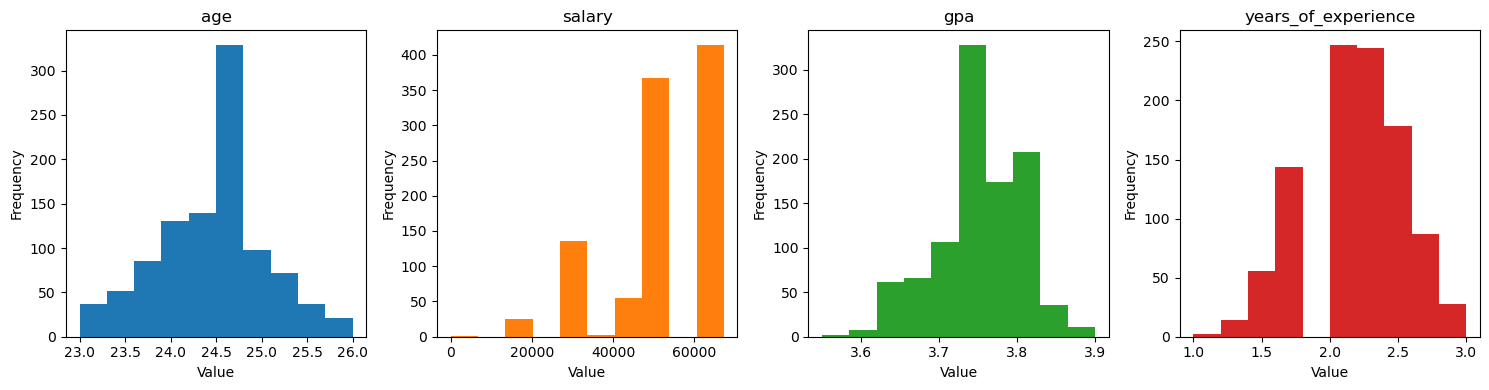

Sample size :  10


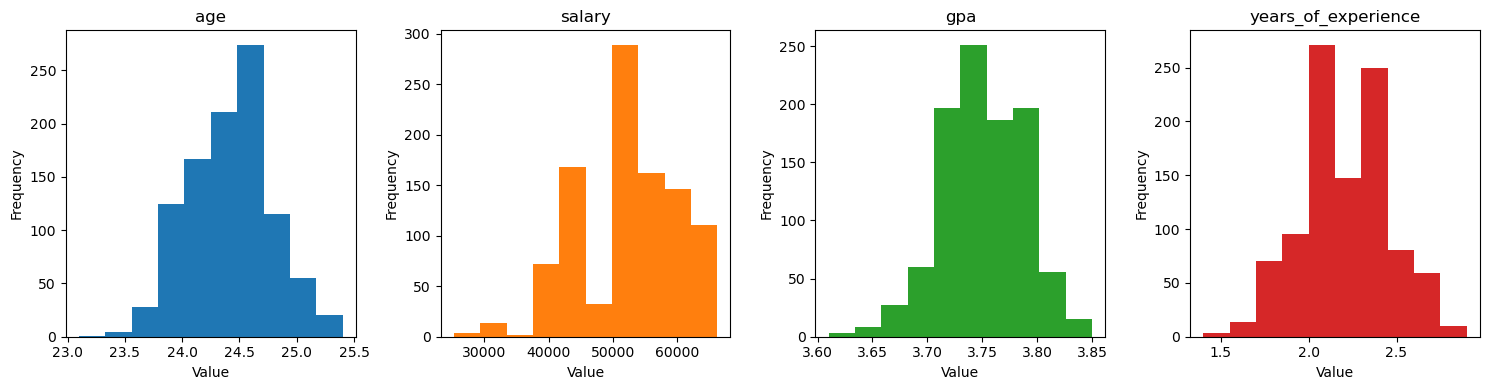

Sample size :  50


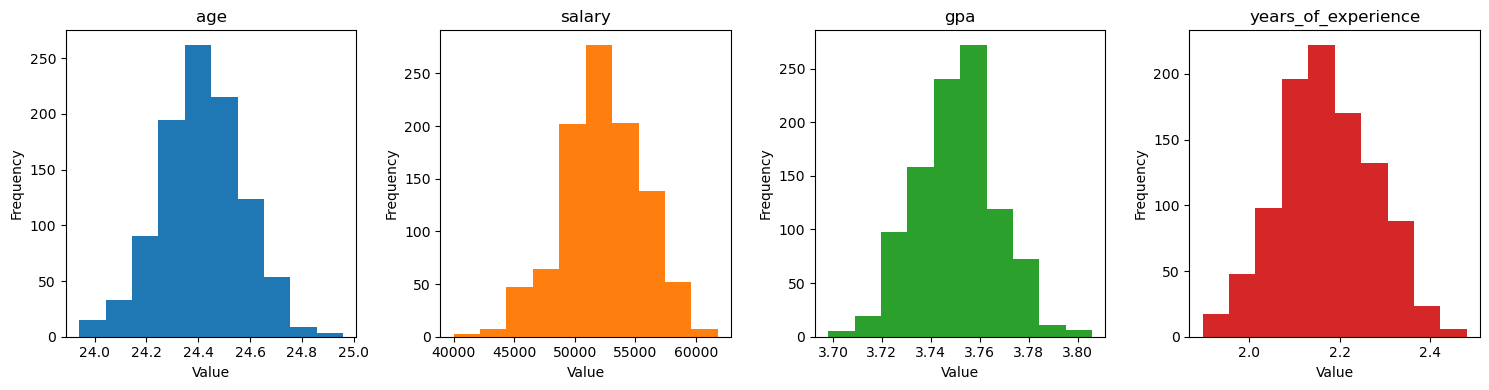

Sample size :  200


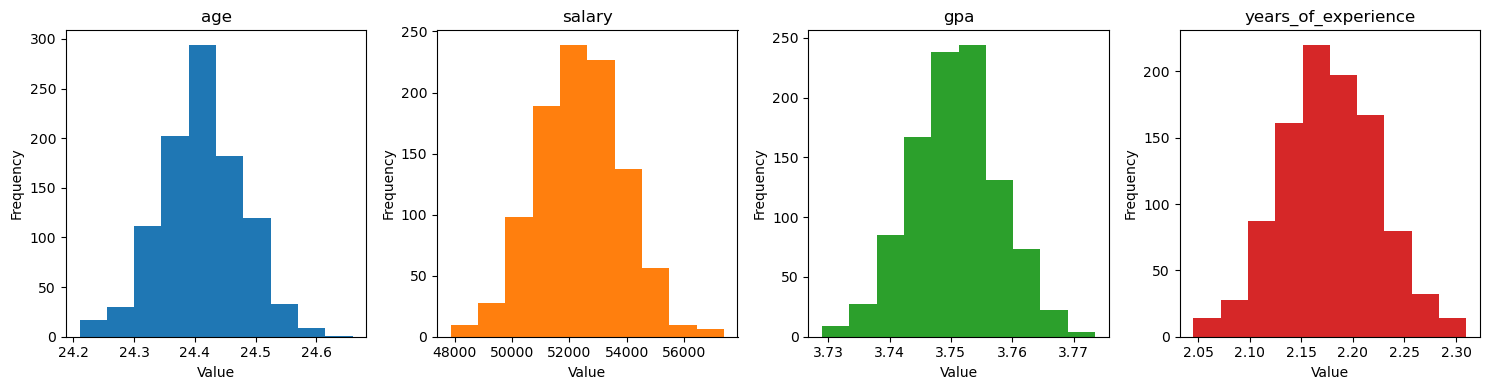

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

SAMPLE_NUMBER = 1000

def clt_generator(file_name: str, sample_size:int):
    data_set = pd.read_csv(file_name)
    
    age_means = []
    salary_means = []
    gpa_means = []
    years_of_experience_means = []
    
    for i in range(SAMPLE_NUMBER):
        sample = data_set.sample(n = sample_size)
        
        age_means.append(sample.loc[:, 'age'].mean())
        salary_means.append(sample.loc[:, 'salary'].mean())
        gpa_means.append(sample.loc[:, 'gpa'].mean())
        years_of_experience_means.append(sample.loc[:, 'years_of_experience'].mean())

    sample_means = pd.DataFrame({
        'age': age_means,
        'salary': salary_means,
        'gpa': gpa_means,
        'years_of_experience': years_of_experience_means
    })
    
    return sample_means;

def plotting(df, sample_size:int):
    fig, axs = plt.subplots(1, len(df.columns), figsize=(15, 4))

    for i, col in enumerate(df.columns):
        axs[i].hist(df[col], color='C{}'.format(i))
        axs[i].set_title(col)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    print("Sample size : ", sample_size)
    plt.show()
    
    
testing_sample_sizes = [4, 10 , 50, 200]
for s in testing_sample_sizes:
    plotting(clt_generator("job_placement.csv", s), s)